# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Mounting Drive and adding path to the folder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading the streamflow quantiles csv

In [5]:
path = '/content/drive/MyDrive/Camels Aus Data/Project files/streamflow_quantiles_gev.csv'
sf_quantiles = pd.read_csv(path)
sf_quantiles = sf_quantiles.drop(columns = ['Unnamed: 0'])
sf_quantiles.rename(columns = {'Station':'station_id'}, inplace = True)
sf_quantiles.head()

,station_id,Shape,Loc,Scale,Q2,Q5,Q10,Q15,Q20,Q25,Q50
0,915011A,-0.416131,25.357935,23.351684,1.052327,4.788546,8.902321,12.231436,15.276372,18.226138,34.603790
1,919003A,-6.071808,5.280006,8.470556,3.885296,3.886727,3.893759,3.913522,3.962515,4.076931,16.799249
2,919309A,-5.779993,15.368448,8.163140,13.956670,13.958626,13.967523,13.991016,14.046369,14.169938,25.703968
3,922101B,-0.307294,69.380459,56.730089,6.168513,16.543656,27.642524,36.404765,44.264634,51.750075,91.388886
4,926002A,-0.313555,42.450923,23.192617,16.710750,20.919850,25.430034,28.995774,32.197882,35.250442,51.459020


In [6]:
sf_quantiles.shape

(136, 11)

# Reading the Precipitation quantiles csv

In [7]:
path = '/content/drive/MyDrive/Camels Aus Data/Project files/precipitation_quantiles_gev.csv'
prec_quantiles = pd.read_csv(path)
prec_quantiles = prec_quantiles.drop(columns = ['Unnamed: 0'])
prec_quantiles.rename(columns = {'Station':'station_id'}, inplace = True)
prec_quantiles.head()

,station_id,Shape,Loc,Scale,Q2,Q5,Q10,Q15,Q20,Q25,Q50
0,915011A,-0.218057,52.705225,16.264419,33.514945,36.834284,40.302191,42.984928,45.353285,47.577488,58.911028
1,919003A,-0.006509,54.469546,19.544590,27.927663,33.101836,38.212891,41.980469,45.182960,48.092395,61.641442
2,919309A,-0.096363,47.535273,14.418281,29.105711,32.523278,35.980506,38.581793,40.828777,42.899114,52.914188
3,922101B,-0.594211,77.734171,25.389902,54.003444,57.268059,61.036219,64.211489,67.209584,70.196135,88.130974
4,926002A,-0.077070,86.539014,24.707751,54.547351,60.544486,66.580281,71.101780,74.993975,78.569350,95.723836


# Calculating the correlation between the quantiles of Streamflow and Precipitation values for all the stations

In [168]:
np.max(prec_quantiles['Q50'])

198.42056472695768

In [177]:
quantiles = ['Q2',	'Q5',	'Q10',	'Q15',	'Q20',	'Q25',	'Q50']

<function matplotlib.pyplot.show(close=None, block=None)>

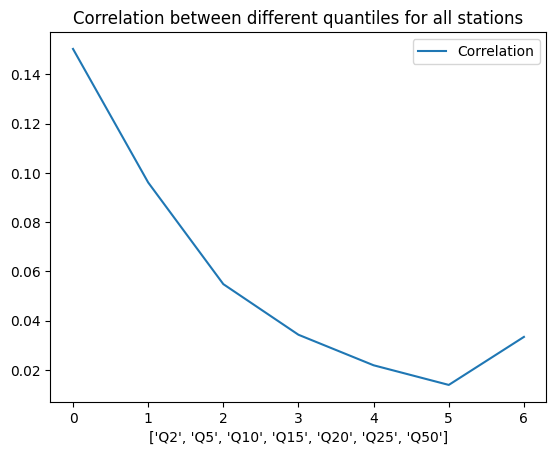

In [180]:
correlations = []
for q in quantiles:
  correlations.append(np.corrcoef(sf_quantiles[q]/np.max(sf_quantiles[q]),prec_quantiles[q]/np.max(prec_quantiles[q]))[0][1])
plt.plot(np.arange(7),correlations,label = 'Correlation')
plt.legend()
plt.title('Correlation between different quantiles for all stations')
plt.xlabel(quantiles)
plt.show

# Plotting the streamflow and precipitation quantiles together

In [181]:
sf = np.array(sf_quantiles['Q10'])/np.max(sf_quantiles['Q10'])
rain = np.array(prec_quantiles['Q10'])/np.max(prec_quantiles['Q10'])
# print(sf,rain)

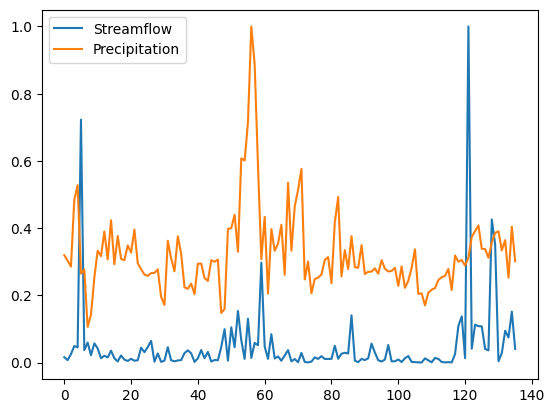

In [182]:
plt.plot(np.arange(136),sf,label = 'Streamflow')
plt.plot(np.arange(136),rain,label = 'Precipitation')
plt.legend()

In [172]:
np.corrcoef(sf,rain)

array([[1.        , 0.05485879],
       [0.05485879, 1.        ]])

# Plotting the inverse quantile function for streamflow and precipitation together for a particular station

In [166]:
station = 0
stations = {
    'Streamflow': {'shape': sf_quantiles.iloc[station,1]	, 'loc': sf_quantiles.iloc[station,2], 'scale': sf_quantiles.iloc[station,3]},
    'Rainfall': {'shape': prec_quantiles.iloc[station,1]	, 'loc': prec_quantiles.iloc[station,2], 'scale': prec_quantiles.iloc[station,3]}
}

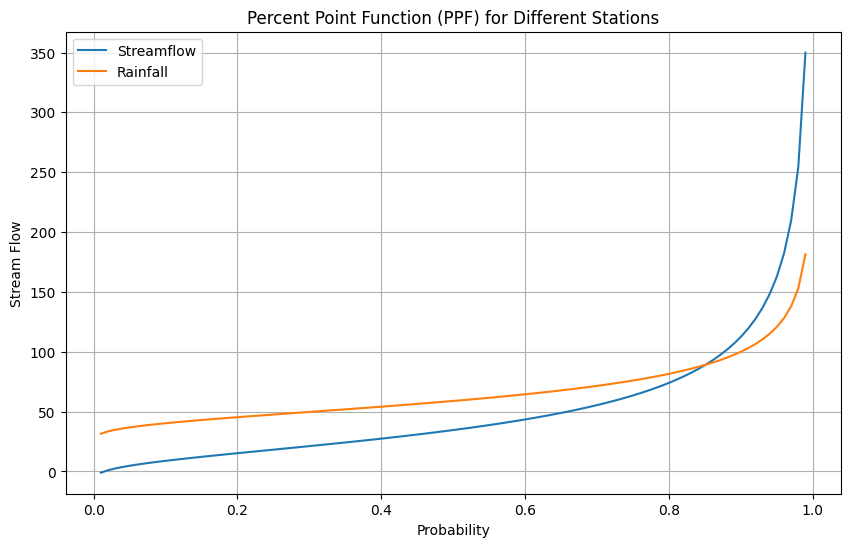

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genextreme
probabilities = np.linspace(0.01, 0.99, 100)  # Avoid exactly 0 or 1 to prevent infinities or undefined values
plt.figure(figsize=(10, 6))

for name, params in stations.items():
    # Calculate the PPF for each station
    ppf_values = genextreme.ppf(probabilities, params['shape'], loc=params['loc'], scale=params['scale'])

    # Plotting the PPF curve
    plt.plot(probabilities, ppf_values, label=name)

plt.title('Percent Point Function (PPF) for Different Stations')
plt.xlabel('Probability')
plt.ylabel('Stream Flow')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
prec_quantiles.shape

(136, 11)

# Reading the Soil Attributes csv

In [9]:
path = '/content/drive/MyDrive/Camels Aus Data/Project files/soil_attributes.csv'
soil_att = pd.read_csv(path)
soil_att = soil_att.drop(columns = ['Unnamed: 0'])
soil_att.head()

,station_id,geol_prim_prop,geol_sec_prop,unconsoldted,igneous,silicsed,carbnatesed,othersed,metamorph,sedvolc,oldrock,claya,clayb,sanda,solum_thickness,ksat,solpawhc
0,915011A,0.893706,0.105490,0.105490,0.893706,0.000804,0.0,0.000000,0.000000,0.000000,0.000000,62.000000,62.000000,22.00000,1.094932,251.409790,143.969116
1,919003A,0.677353,0.162288,0.130245,0.162288,0.677353,0.0,0.010952,0.014850,0.004309,0.000000,21.000000,21.000000,52.00000,0.558830,60.711822,93.082611
2,919309A,0.532112,0.172999,0.154676,0.532112,0.172999,0.0,0.085286,0.054931,0.000000,0.058285,20.095238,41.047619,66.76191,0.716285,107.988701,104.810654
3,922101B,0.905953,0.076808,0.000000,0.905953,0.000000,0.0,0.017238,0.076808,0.000000,0.076808,18.000000,54.000000,68.00000,1.015788,96.575882,125.600266
4,926002A,1.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,19.000000,39.000000,65.00000,1.051716,152.589203,196.107590


# Reading the landcover attributes and vegetation csv

In [10]:
path = '/content/drive/MyDrive/Camels Aus Data/Project files/land_cover_attributes.csv'
lc_att = pd.read_csv(path)
lc_att = lc_att.drop(columns = ['Unnamed: 0'])
lc_att.head()

,station_id,lc01_extracti,lc03_waterbo,lc04_saltlak,lc05_irrcrop,lc06_irrpast,lc07_irrsuga,lc08_rfcropp,lc09_rfpastu,lc10_rfsugar,...,nvis_forests_n,nvis_forests_e,nvis_shrubs_n,nvis_shrubs_e,nvis_woodlands_n,nvis_woodlands_e,nvis_bare_n,nvis_bare_e,nvis_nodata_n,nvis_nodata_e
0,915011A,0.0000,0.00000,0.0,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,...,0.000000,0.000000,0.000000,0.000000,100.000000,100.000000,0.0,0.0,0.0,0.000000
1,919003A,0.0002,0.00301,0.0,0.00314,0.00056,0.0006,0.00000,0.00501,0.0005,...,7.713339,7.590923,0.000000,0.000000,91.809517,91.023895,0.0,0.0,0.0,0.000954
2,919309A,0.0005,0.00005,0.0,0.00932,0.00061,0.0009,0.00033,0.00251,0.0000,...,2.393718,2.393718,0.000000,0.000000,97.483543,97.480568,0.0,0.0,0.0,0.000000
3,922101B,0.0000,0.00000,0.0,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,...,54.136253,54.136253,0.000000,0.000000,45.863754,44.183971,0.0,0.0,0.0,0.000000
4,926002A,0.0000,0.00000,0.0,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,...,3.898097,3.898097,5.871449,5.871449,89.503685,86.790871,0.0,0.0,0.0,0.000000


# Reading the topography and geometry csv

In [11]:
path = '/content/drive/MyDrive/Camels Aus Data/Project files/top_geo_attributes.csv'
topg_att = pd.read_csv(path)
topg_att = topg_att.drop(columns = ['Unnamed: 0'])
topg_att.head()

,station_id,elev_min,elev_max,elev_mean,elev_range,mean_slope_pct,upsdist,strdensity,strahler,elongratio,...,mrvbf_prop_1,mrvbf_prop_2,mrvbf_prop_3,mrvbf_prop_4,mrvbf_prop_5,mrvbf_prop_6,mrvbf_prop_7,mrvbf_prop_8,mrvbf_prop_9,confinement
0,915011A,739,984.951111,839.435852,245.951111,2.64,40.956673,0.594576,4,0.648115,...,0.0182,0.1305,0.2167,0.1030,0.1314,0.0671,0.0000,0.0,0.0,0.30
1,919003A,183,1355.225342,460.982819,1172.225342,13.45,230.620071,1.006411,7,0.431006,...,0.0737,0.1225,0.1412,0.0279,0.0238,0.0089,0.0000,0.0,0.0,1.00
2,919309A,124,1290.396118,442.698334,1166.396118,9.97,317.360138,0.957482,6,0.331029,...,0.0560,0.1233,0.1843,0.0388,0.0304,0.0201,0.0259,0.0,0.0,0.00
3,922101B,185,796.703796,447.701813,611.703796,12.51,33.317734,1.056104,4,0.442585,...,0.1020,0.1492,0.1151,0.0042,0.0002,0.0000,0.0000,0.0,0.0,1.00
4,926002A,40,148.970367,80.159149,108.970367,2.93,36.863930,0.813913,4,0.562866,...,0.0169,0.1700,0.3654,0.0304,0.0082,0.0054,0.0002,0.0,0.0,0.57


# Reading the Anthropogenic attributes csv

In [12]:
path = '/content/drive/MyDrive/Camels Aus Data/Project files/anthro_attributes.csv'
anthro_att = pd.read_csv(path)
anthro_att = anthro_att.drop(columns = ['Unnamed: 0'])
anthro_att.head()

,station_id,distupdamw,impound_fac,flow_div_fac,leveebank_fac,infrastruc_fac,settlement_fac,extract_ind_fac,landuse_fac,catchment_di,flow_regime_di,river_di
0,915011A,40.956673,0.0,0.0,0,0.000000,0.000000,0.0,0.350000,0.213224,0.000682,0.106953
1,919003A,217.713760,0.0,0.0,0,0.000000,0.040000,0.0,0.050000,0.054700,0.146411,0.100555
2,919309A,294.372955,0.0,0.0,0,0.077778,0.011268,0.0,0.050000,0.064917,0.200487,0.132702
3,922101B,33.317734,0.0,0.0,0,0.250000,0.250000,0.0,0.287500,0.121370,0.000000,0.060685
4,926002A,36.863930,0.0,0.0,0,0.000000,0.011268,0.0,0.008451,0.019149,0.000000,0.009575


# Reading the Catchment area csv

In [13]:
path = '/content/drive/MyDrive/Camels Aus Data/Project files/catchment_area.csv'
area_att = pd.read_csv(path)
area_att = area_att.drop(columns = ['Unnamed: 0'])
area_att['station_id']=anthro_att['station_id']
area_att.head()

,catchment_area,station_id
0,565.3,915011A
1,7731.7,919003A
2,8656.4,919309A
3,171.2,922101B
4,330.2,926002A


In [14]:
print(sf_quantiles.shape)
print(prec_quantiles.shape)
print(soil_att.shape)
print(lc_att.shape)
print(topg_att.shape)
print(anthro_att.shape)
print(area_att.shape)

(136, 11)
(136, 11)
(136, 17)
(136, 36)
(136, 23)
(136, 12)
(136, 2)


In [15]:
prec_quantiles.shape[1]+soil_att.shape[1]+lc_att.shape[1]+topg_att.shape[1]+anthro_att.shape[1]

99

# Creating X and Y variables for training and testing models

In [16]:
from sklearn.model_selection import train_test_split

In [183]:
Y = sf_quantiles['Q20']

In [193]:
Y.shape

(136,)

In [184]:
merged_df = pd.merge(prec_quantiles, soil_att, on='station_id')
merged_df = pd.merge(merged_df, lc_att, on='station_id')
merged_df = pd.merge(merged_df, topg_att, on='station_id')
merged_df = pd.merge(merged_df, anthro_att, on='station_id')
merged_df = pd.merge(merged_df, area_att, on='station_id')

# Print the merged DataFrame
merged_df.head()


,station_id,Shape,Loc,Scale,Q2,Q5,Q10,Q15,Q20,Q25,...,flow_div_fac,leveebank_fac,infrastruc_fac,settlement_fac,extract_ind_fac,landuse_fac,catchment_di,flow_regime_di,river_di,catchment_area
0,915011A,-0.218057,52.705225,16.264419,33.514945,36.834284,40.302191,42.984928,45.353285,47.577488,...,0.0,0,0.000000,0.000000,0.0,0.350000,0.213224,0.000682,0.106953,565.3
1,919003A,-0.006509,54.469546,19.544590,27.927663,33.101836,38.212891,41.980469,45.182960,48.092395,...,0.0,0,0.000000,0.040000,0.0,0.050000,0.054700,0.146411,0.100555,7731.7
2,919309A,-0.096363,47.535273,14.418281,29.105711,32.523278,35.980506,38.581793,40.828777,42.899114,...,0.0,0,0.077778,0.011268,0.0,0.050000,0.064917,0.200487,0.132702,8656.4
3,922101B,-0.594211,77.734171,25.389902,54.003444,57.268059,61.036219,64.211489,67.209584,70.196135,...,0.0,0,0.250000,0.250000,0.0,0.287500,0.121370,0.000000,0.060685,171.2
4,926002A,-0.077070,86.539014,24.707751,54.547351,60.544486,66.580281,71.101780,74.993975,78.569350,...,0.0,0,0.000000,0.011268,0.0,0.008451,0.019149,0.000000,0.009575,330.2


In [185]:
merged_df.shape

(136, 96)

In [187]:
merged_df.drop(columns = ['Shape','station_id','Loc','Scale','Q2','Q5','Q15','Q25','Q10','Q50'],inplace = True)
merged_df.head()

,Q20,geol_prim_prop,geol_sec_prop,unconsoldted,igneous,silicsed,carbnatesed,othersed,metamorph,sedvolc,...,flow_div_fac,leveebank_fac,infrastruc_fac,settlement_fac,extract_ind_fac,landuse_fac,catchment_di,flow_regime_di,river_di,catchment_area
0,45.353285,0.893706,0.105490,0.105490,0.893706,0.000804,0.0,0.000000,0.000000,0.000000,...,0.0,0,0.000000,0.000000,0.0,0.350000,0.213224,0.000682,0.106953,565.3
1,45.182960,0.677353,0.162288,0.130245,0.162288,0.677353,0.0,0.010952,0.014850,0.004309,...,0.0,0,0.000000,0.040000,0.0,0.050000,0.054700,0.146411,0.100555,7731.7
2,40.828777,0.532112,0.172999,0.154676,0.532112,0.172999,0.0,0.085286,0.054931,0.000000,...,0.0,0,0.077778,0.011268,0.0,0.050000,0.064917,0.200487,0.132702,8656.4
3,67.209584,0.905953,0.076808,0.000000,0.905953,0.000000,0.0,0.017238,0.076808,0.000000,...,0.0,0,0.250000,0.250000,0.0,0.287500,0.121370,0.000000,0.060685,171.2
4,74.993975,1.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0,0.000000,0.011268,0.0,0.008451,0.019149,0.000000,0.009575,330.2


In [188]:
X = merged_df
X.shape

(136, 86)

In [189]:
np.corrcoef(X['Q20'],Y)

array([[1.        , 0.02190704],
       [0.02190704, 1.        ]])

In [190]:
print(X.shape)
print(Y.shape)

(136, 86)
(136,)


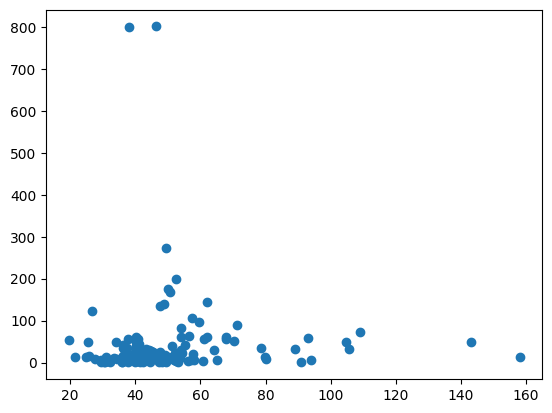

In [67]:
plt.scatter(X['Q25'],Y)


In [196]:
np.corrcoef(X['Q20'],Y)[0][1]

0.021907040359281767

In [199]:
X.iloc[:,0]

0      45.353285
1      45.182960
2      40.828777
3      67.209584
4      74.993975
         ...    
131    47.013572
132    51.793191
133    36.114801
134    57.208455
135    42.336295
Name: Q20, Length: 136, dtype: float64

# Trying to understand the highly correlated features

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


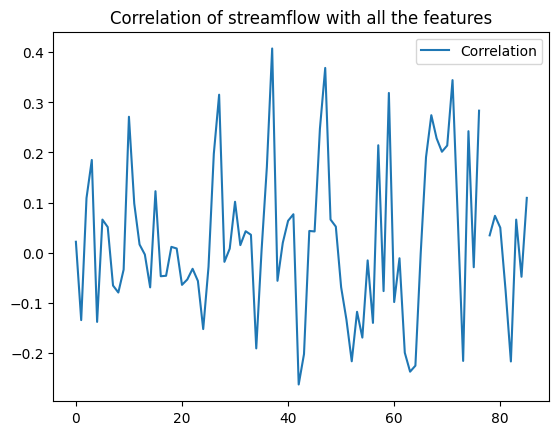

[10, 27, 37, 46, 47, 57, 59, 67, 68, 69, 70, 71, 74, 76]


In [201]:
feature_correlations = []
required_features = []
for i in range(86):
  corr = np.corrcoef(X.iloc[:,i],Y)[0][1]
  feature_correlations.append(np.corrcoef(X.iloc[:,i],Y)[0][1])
  if corr>0.2:
    required_features.append(i)
plt.plot(np.arange(86),feature_correlations,label='Correlation')
plt.title('Correlation of streamflow with all the features')
plt.legend()
plt.show()
print(required_features)

In [205]:
columns_to_keep_names = [X.columns[i] for i in required_features]

# Select only the columns to keep
tempX = X[columns_to_keep_names]

In [206]:
tempX.head()

,oldrock,lc14_tussclo,lc34_woodspa,nvis_woodlands_n,nvis_woodlands_e,upsdist,strahler,mrvbf_prop_4,mrvbf_prop_5,mrvbf_prop_6,mrvbf_prop_7,mrvbf_prop_8,distupdamw,flow_div_fac
0,0.000000,0.06195,0.39195,100.000000,100.000000,40.956673,4,0.1030,0.1314,0.0671,0.0000,0.0,40.956673,0.0
1,0.000000,0.18367,0.50510,91.809517,91.023895,230.620071,7,0.0279,0.0238,0.0089,0.0000,0.0,217.713760,0.0
2,0.058285,0.17995,0.54406,97.483543,97.480568,317.360138,6,0.0388,0.0304,0.0201,0.0259,0.0,294.372955,0.0
3,0.076808,0.00789,0.00185,45.863754,44.183971,33.317734,4,0.0042,0.0002,0.0000,0.0000,0.0,33.317734,0.0
4,0.000000,0.01148,0.00695,89.503685,86.790871,36.863930,4,0.0304,0.0082,0.0054,0.0002,0.0,36.863930,0.0


In [207]:
tempX.shape

(136, 14)

# Splitting data to train and test sets

In [208]:
X_train,X_test,Y_train,Y_test = train_test_split(tempX,Y,test_size = 0.2,random_state = 42)

# Standardising the data

In [209]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [210]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [211]:
print(X_train.shape)

(108, 14)


# Using PCA to reduce the dimensions from 86

In [212]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 14)

In [213]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [214]:
print(X_train_trf.shape)
print(X_test_trf.shape)

(108, 14)
(28, 14)


# Creating a Linear Regression model

In [215]:
from sklearn.linear_model import LinearRegression

In [216]:
regression = LinearRegression()
regression.fit(X_train_trf,Y_train)

LinearRegression()

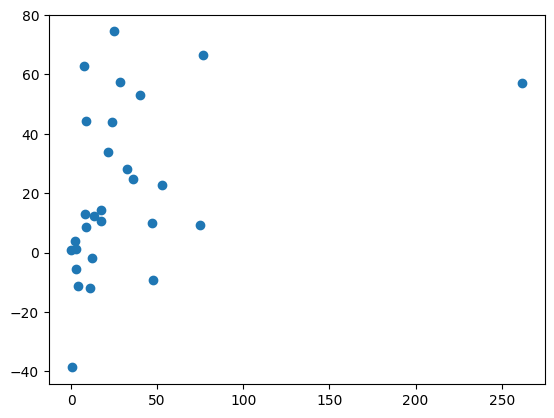

In [217]:
Y_pred = regression.predict(X_test_trf)
plt.scatter(Y_test,Y_pred)


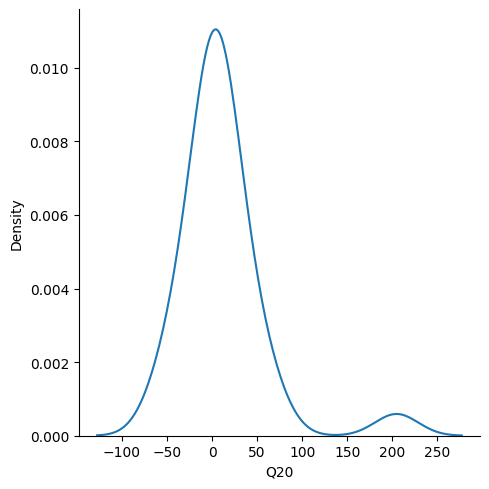

In [218]:
import seaborn as sns
residuals = Y_test - Y_pred
## plot these residuals
sns.displot(residuals,kind = 'kde')

In [219]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(Y_test,Y_pred))
print(mean_squared_error(Y_test,Y_pred))
print(np.sqrt(mean_squared_error(Y_test,Y_pred)))

26.934101245776308
2249.822667494409
47.43229561695711


In [220]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,Y_pred)
print(score)

0.06144290853419121


In [221]:
# X_train_trf = np.array(X_train_trf)
# Y_train = np.array(Y_train)

# Creating an ANN

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # Type of layer
from tensorflow.keras.layers import LeakyReLU,ReLU,ELU,PReLU # Activation functions
from tensorflow.keras.layers import Dropout

In [40]:
from tensorflow.keras import models, layers

model_ann = models.Sequential([
    layers.Dense(8,activation='relu'),
    layers.Dense(15,activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(6,activation='relu'),
    layers.Dense(1)
])

In [41]:
import tensorflow as tf
model_ann.compile(optimizer = tf.keras.optimizers.Adam(),loss = tf.keras.losses.MeanAbsoluteError(),metrics = [tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.MeanSquaredError()]) ## By default the learning rate is initialised as 0.01.


In [42]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [43]:
Model_ann = model_ann.fit(X_train_trf,Y_train, epochs = 100, batch_size = 20, callbacks = [early_stopping], validation_split = .2)

Epoch 1/100
5/5 [==============================] - 1s 63ms/step - loss: 33.8754 - mean_absolute_error: 33.8754 - mean_squared_error: 7348.5117 - val_loss: 62.0428 - val_mean_absolute_error: 62.0428 - val_mean_squared_error: 26407.6328
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 33.7752 - mean_absolute_error: 33.7752 - mean_squared_error: 7329.6396 - val_loss: 61.9754 - val_mean_absolute_error: 61.9754 - val_mean_squared_error: 26400.2988
Epoch 3/100
5/5 [==============================] - 0s 11ms/step - loss: 33.6692 - mean_absolute_error: 33.6692 - mean_squared_error: 7303.7368 - val_loss: 61.9101 - val_mean_absolute_error: 61.9101 - val_mean_squared_error: 26393.0645
Epoch 4/100
5/5 [==============================] - 0s 10ms/step - loss: 33.7290 - mean_absolute_error: 33.7290 - mean_squared_error: 7338.5718 - val_loss: 61.8438 - val_mean_absolute_error: 61.8438 - val_mean_squared_error: 26386.0645
Epoch 5/100
5/5 [==============================] - 0s 10ms/s

1/1 [==============================] - 0s 94ms/step
Mean Squared Error (MSE): 2560.905429552616
Mean Absolute Error (MAE): 24.852350315784836
R-squared: -0.06833128948634104


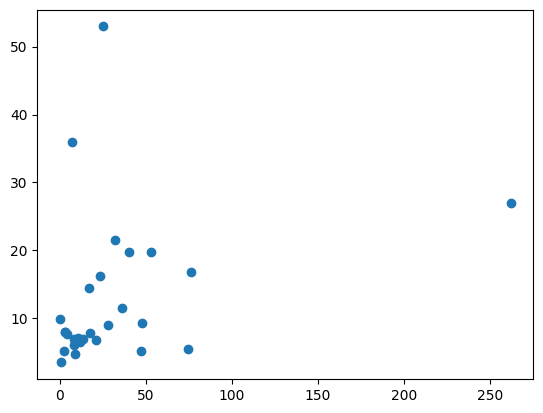

In [44]:
predictions = model_ann.predict(X_test_trf)
mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)
plt.scatter(Y_test,predictions)


# Creating a XGB Regressor

In [45]:
!pip install xgboost

In [45]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [46]:
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train_trf, Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [47]:
y_pred_xgb = model_xgb.predict(X_test_trf)


In [48]:
mse = mean_squared_error(Y_test, y_pred_xgb)
mse = mean_squared_error(Y_test, y_pred_xgb)
mae = mean_absolute_error(Y_test, y_pred_xgb)
r2 = r2_score(Y_test, y_pred_xgb)
print("Mean Squared Error:", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)

Mean Squared Error: 33877.02042169166
Mean Absolute Error (MAE): 68.46501440736378
R-squared: -13.13245506585676


# Creating a Support vector Regressor

In [49]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

model_svr = SVR()
model_svr.fit(X_train_trf, Y_train)

y_pred_svr = model_svr.predict(X_test_trf)

mse = mean_squared_error(Y_test, y_pred_svr)
mse = mean_squared_error(Y_test, y_pred_svr)
mae = mean_absolute_error(Y_test, y_pred_svr)
r2 = r2_score(Y_test, y_pred_svr)
print("Mean Squared Error:", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)

Mean Squared Error: 2748.267497278106
Mean Absolute Error (MAE): 24.381897476779265
R-squared: -0.14649300412996524
